<a href="https://colab.research.google.com/github/LikeABug/class_RSU/blob/main/Set_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#IMPORTAR LIBRERIAS
import imgaug.augmenters as iaa
import numpy as np
import random
import os
from PIL import Image

In [ ]:
#DEFINICION DE FUNCIONES
def load_images_from_folder(folder):                  #Se da como entrada la direccion de una carpeta desde la que se cargan
  images = []                                         #las imagenes y se devuelve un arreglo con ellas
  for filename in os.listdir(folder): 
    img = Image.open(os.path.join(folder,filename)) 
    if img is not None: 
      images.append(img) 
  return images 

# Funciones para generar nueva data
#########################################################
def crop(img):                         #recorte         #   
  img = numpy.array(img)                                #
  crop = iaa.Crop(percent=(0, 0.3))                     #
  imgn=crop.augment_image(img)                          #
  imgn = Image.fromarray(np.uint8(imgn)).convert('RGB') #
  return imgn                                           #
                                                        #
def flip(img):                    #Voltear horizontal   #   
  img = numpy.array(img)                                #
  flip_hr=iaa.Fliplr(p=1.0)                             #
  imgn= flip_hr.augment_image(img)                      #
  imgn = Image.fromarray(np.uint8(imgn)).convert('RGB') #
  return imgn                                           #
                                                        #
def flipup(img):                   #volter  vertical    #
  img = numpy.array(img)                                #
  flip_vr=iaa.Flipud(p=1.0)                             #
  imgn= flip_vr.augment_image(img)                      #
  imgn = Image.fromarray(np.uint8(imgn)).convert('RGB') #
  return imgn                                           #
                                                        #
def bright(img):                     #brillo            #
  img = numpy.array(img)                                #
  gama = random.uniform(0.5, 1.0)                       #
  contrast=iaa.GammaContrast(gamma=gama)                #
  imgn =contrast.augment_image(img)                     #
  imgn = Image.fromarray(np.uint8(imgn)).convert('RGB') #
  return imgn                                           #
#########################################################

def data_aug(imag):                 #Generador random de nuevas imagenes
  imgn = imag                       #se decide de manera aleatoria que filtro se le aplica a cada imagen

  a = random.choice([0,1])
  if a == 0:
    imgn = crop(imgn)
    
  a = random.choice([0,1])
  if a == 0:
    imgn = flip(imgn)

  a = random.choice([0,1])
  if a == 0:
    imgn = flipup(imgn)

  imgn = bright(imgn)
  return imgn


def aumento_data(folder_in, folder_out, dimencion, n_new_images):           #-->Se leen las imagenes dede floder_in
  for filename in os.listdir(folder_in):                                    #-->Se asegura la dimencion especificada y el formato jpeg
    img = Image.open(os.path.join(folder_in,filename)).convert('RGB')       #-->Se genera el numero de nuevas imagenes de cada una de
    new_img = img.resize((dimencion, dimencion))                            #las imagenes en folder_in y se guardan, finalmente, en 
    new_img.save(os.path.join(folder_out,filename),"jpeg")                  #folder_out

    for i in range(0, n_new_images):
      new_img = data_aug(img)
      new_img = new_img.resize((dimencion, dimencion))
      new_img.save(os.path.join(folder_out, str(i) + filename),"jpeg")

Generacion de nuevas imagenes de cada clase 

In [ ]:
aumento_data("/gdrive/My Drive/Taller de Investigacion/Fuentes/Set/vidrio",
             "/gdrive/My Drive/224pixel/vidrio", 224, 8)

In [ ]:
aumento_data("/gdrive/My Drive/Taller de Investigacion/Fuentes/Set/metal",
             "/gdrive/My Drive/224pixel/metal", 224, 8)

In [ ]:
aumento_data("/gdrive/My Drive/Taller de Investigacion/Fuentes/Set/papel",
             "/gdrive/My Drive/224pixel/papel", 224, 8)

In [ ]:
aumento_data("/gdrive/My Drive/Taller de Investigacion/Fuentes/Set/plastico",
             "/gdrive/My Drive/224pixel/plastico", 224, 8)

##Division del total de imagenes en entrenamiento y validacion


*   70% entrenamiento
*   30% validacion


In [ ]:
from sklearn.model_selection import train_test_split 

metal = load_images_from_folder("/gdrive/My Drive/224pixel/metal")              #Se carga el total de imagenes de cada clase(ya con data augmentation)
plastico = load_images_from_folder("/gdrive/My Drive/224pixel/plastico")
papel = load_images_from_folder("/gdrive/My Drive/224pixel/papel")
vidrio = load_images_from_folder("/gdrive/My Drive/224pixel/vidrio")

#se realiza la separacion de dos variables de cada clase, entrenamiento y validacion
train_me, test_me = train_test_split(metal, test_size = 0.30)
train_pl, test_pl = train_test_split(plastico, test_size = 0.30)
train_pa, test_pa = train_test_split(papel, test_size = 0.30)
train_vi, test_vi = train_test_split(vidrio, test_size = 0.30)

Las imagenes se encuentran en variables despues del split asi que deben ser puestas en su respectivo folder, teniendo siempre en cuenta que la estructura para tomar las imagenes y realizar el entrenamiento sera la siguiente:

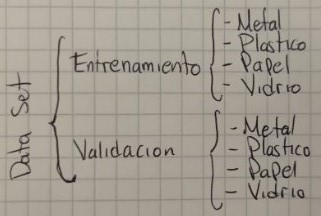

In [ ]:
#se toman las imagenes que se encunetran dentro de las variables de entrenamiento y validacion de cada clase y
#se van guardando en su respectiva carpeta, tomando en cuenta la estructura anterior

n = 0
for elemento in train_me:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/entrenamiento/metal", str(n) + ".jpg"),"jpeg")
for elemento in test_me:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/validacion/metal",str(n) + ".jpg"),"jpeg")

n = 0
for elemento in train_pl:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/entrenamiento/plastico",str(n) + ".jpg"),"jpeg")
for elemento in test_pl:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/validacion/plastico", str(n) + ".jpg"),"jpeg")

n = 0
for elemento in train_pa:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/entrenamiento/papel",str(n) + ".jpg"),"jpeg")
for elemento in test_pa:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/validacion/papel",str(n) + ".jpg"),"jpeg")

  n = 0
for elemento in train_vi:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/entrenamiento/vidrio", str(n) + ".jpg"),"jpeg")
for elemento in test_vi:
  n = n + 1
  elemento.save(os.path.join("/gdrive/My Drive/224pixel/prueba/validacion/vidrio",str(n) + ".jpg"),"jpeg")